In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

c:\WBG\Anaconda3\envs\data-goods\Lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
niger_adm0 = gpd.read_file(
    "../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm0_IGNN_20230720.shp"
)
niger_adm1 = gpd.read_file(
    "../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm1_IGNN_20230720.shp"
)
niger_adm2 = gpd.read_file(
    "../../data/shapefiles/ner_adm_ignn_20230720_ab_shp/NER_admbnda_adm2_IGNN_20230720.shp"
)

In [6]:
niger_gadm = gpd.read_file("../../data/shapefiles/gadm/gadm41_NER_2.json")

In [7]:
libya = gpd.read_file(
    "../../data/shapefiles/libya/lby_admbnda_adm0_unosat_lbsc_20180507.shp"
)
nigeria = gpd.read_file(
    "../../data/shapefiles/nigeria/nga_admbnda_adm0_osgof_20190417.shp"
)
algeria = gpd.read_file(
    "../../data/shapefiles/algeria/dza_admbnda_adm0_unhcr_20200120.shp"
)
chad = gpd.read_file("../../data/shapefiles/chad/tcd_admbnda_adm0_ocha.shp")
mali = gpd.read_file("../../data/shapefiles/mali/mli_admbnda_adm0_1m_gov_20211220.shp")
burkinafaso = gpd.read_file(
    "../../data/shapefiles/burkinafaso/bfa_admbnda_adm0_igb_20200323.shp"
)

In [8]:
neighbors = pd.concat([libya, mali, chad, algeria, nigeria, burkinafaso])
countries_of_interest = pd.concat([niger_adm0, mali, burkinafaso])

# Commuting Zones

In [9]:
commuting_zones = pd.read_excel(
    "../../data/movement/meta/commuting_zones/commuting_zones_niger1.xlsx"
)

In [10]:
from shapely.wkt import loads

# WKT representation of the Polygon

# Create a Polygon geometry object from the WKT representation
commuting_zones["geometry"] = commuting_zones["GEOMETRY"].apply(lambda x: loads(x))

# Now, 'polygon' contains the Polygon geometry object

In [11]:
commuting_zones = gpd.GeoDataFrame(
    commuting_zones, geometry="geometry", crs="EPSG:4326"
)

In [12]:
commuting_zones_coi = commuting_zones.sjoin(countries_of_interest)

In [13]:
commuting_zones_niger = commuting_zones.sjoin(niger_adm0)
# commuting_zones_niger_adm0 = commuting_zones.sjoin(niger_adm0.sjoin(commuting_zones).drop(columns='index_right'))

In [14]:
commuting_zones_niger.to_file(
    "../../data/movement/meta/commuting_zones/commuting_zones_niger.json"
)

## Commuting Zones across Niger and its Neighbors

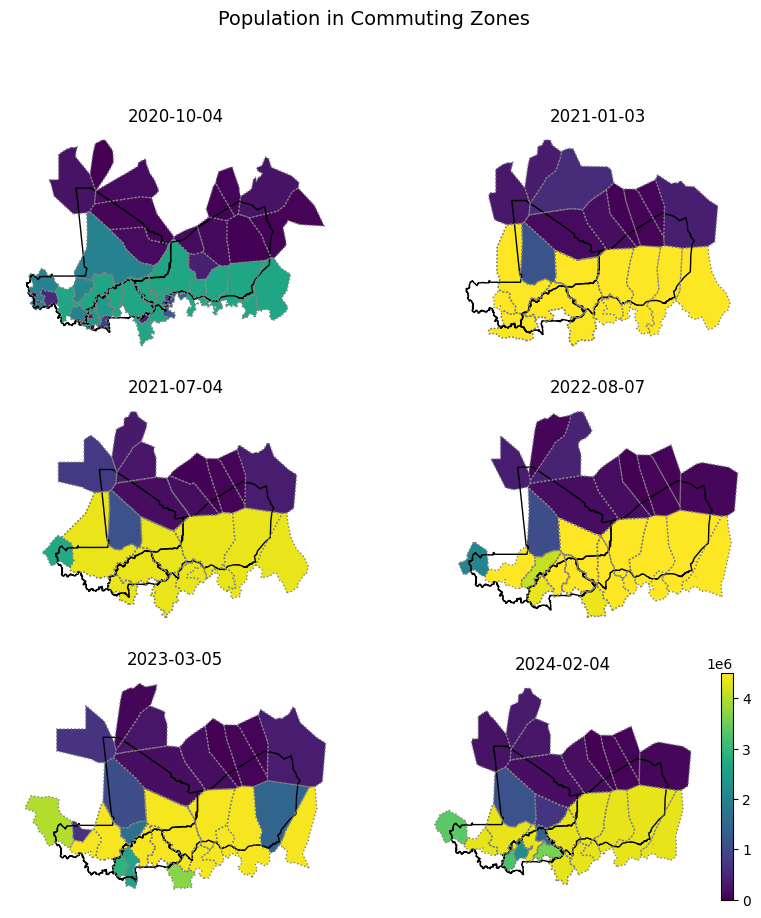

In [84]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
ax = axs.flatten()

for i, date in enumerate(
    ["2020-10-04", "2021-01-03", "2021-07-04", "2022-08-07", "2023-03-05", "2024-02-04"]
):
    if i > 4:
        legend_bool = True
    else:
        legend_bool = False

    countries_of_interest.boundary.plot(ax=ax[i], color="black", linewidth=1)
    commuting_zones_coi[commuting_zones_coi["ds"] == date].boundary.plot(
        ax=ax[i], color="grey", linewidth=1, linestyle="dotted"
    )
    commuting_zones_coi[commuting_zones_coi["ds"] == date].plot(
        ax=ax[i],
        column="win_population",
        cmap="viridis",
        vmin=0,
        vmax=4500000,
        legend=legend_bool,
    )
    ax[i].set_title(date)

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)


# ax[0].text(0,0,'Source: Meta Commuting Zones')

plt.suptitle("Population in Commuting Zones", x=0.5, y=1, fontsize=14);

# fig.savefig('../../docs/images/commuting_zones_population.svg', format='SVG', dpi=300);

### Observations and Limitations 
- If Facebook drew the borders for Niger, some regions would coincide with its neighboring countries. For instance, the northern regions of Niger have commuting zones overlapping with Algeria, and some of the southern regions have overlaps with Nigeria. 
- Between 2023 and 2024, there are not many significant changes in the commuting zones. However, there are differences in the number of people residing in them. For instance, there seems to be far lesser activity in the eastern border of Niger. 

## Commuting Zones in Niger

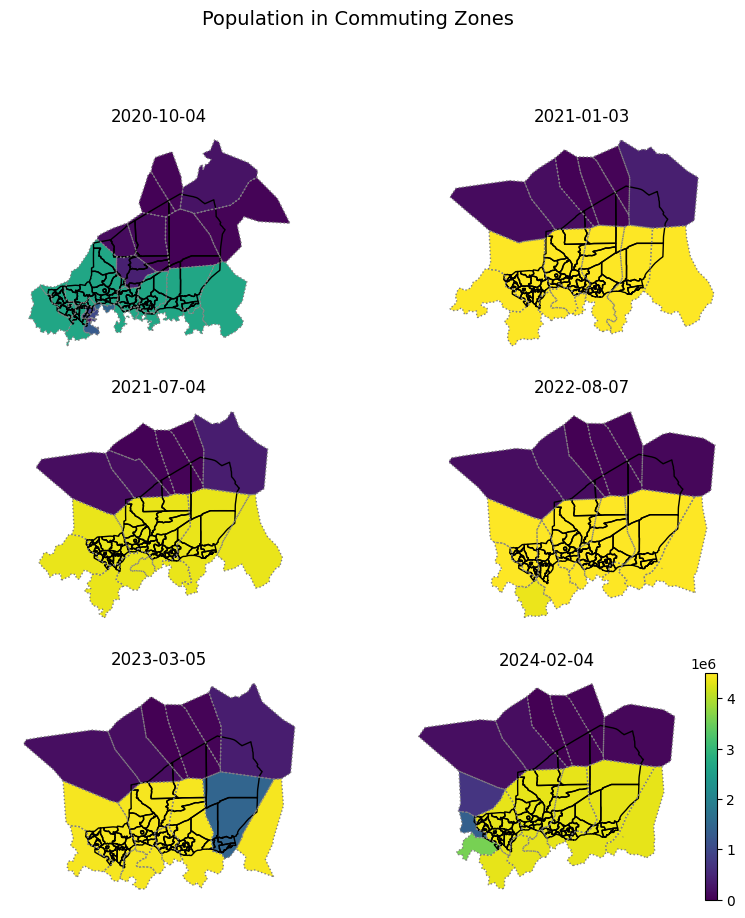

In [96]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
ax = axs.flatten()

for i, date in enumerate(
    ["2020-10-04", "2021-01-03", "2021-07-04", "2022-08-07", "2023-03-05", "2024-02-04"]
):
    if i > 4:
        legend_bool = True
    else:
        legend_bool = False

    niger_adm2.boundary.plot(ax=ax[i], color="black", linewidth=1)
    commuting_zones_niger[commuting_zones_niger["ds"] == date].boundary.plot(
        ax=ax[i], color="grey", linewidth=1, linestyle="dotted"
    )
    commuting_zones_niger[commuting_zones_niger["ds"] == date].plot(
        ax=ax[i],
        column="win_population",
        cmap="viridis",
        vmin=0,
        vmax=4500000,
        legend=legend_bool,
    )
    ax[i].set_title(date)

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)


# ax[0].text(0,0,'Source: Meta Commuting Zones')

plt.suptitle("Population in Commuting Zones", x=0.5, y=1, fontsize=14);

# fig.savefig('../../docs/images/commuting_zones_population.svg', format='SVG', dpi=300);

### Observations and Limitations

- In April 2021 Niger saw its first democratic transfer of power. In July 2023 there was an army-led coup. 
- The population numbers used in this dataset are from High Resolution Satellite Imagery combined with publicly available datasources. Therefore, the total population numbers donot change significantly over the years, making any insights in movement of population more valuable. 
- There were significant, new commuting zones formed from 2020 to 2021 where there was more movement between Niger and Algeria. 
- There aren't significant changes between 2021 and 2022. 
- In 2024, there are fewer people close to the borders between Niger, Mali and Burkina Faso. and the commuting zone split indicating people not moving as far across the borders. 

## Number of Local Business in Commuting Zones of Niger

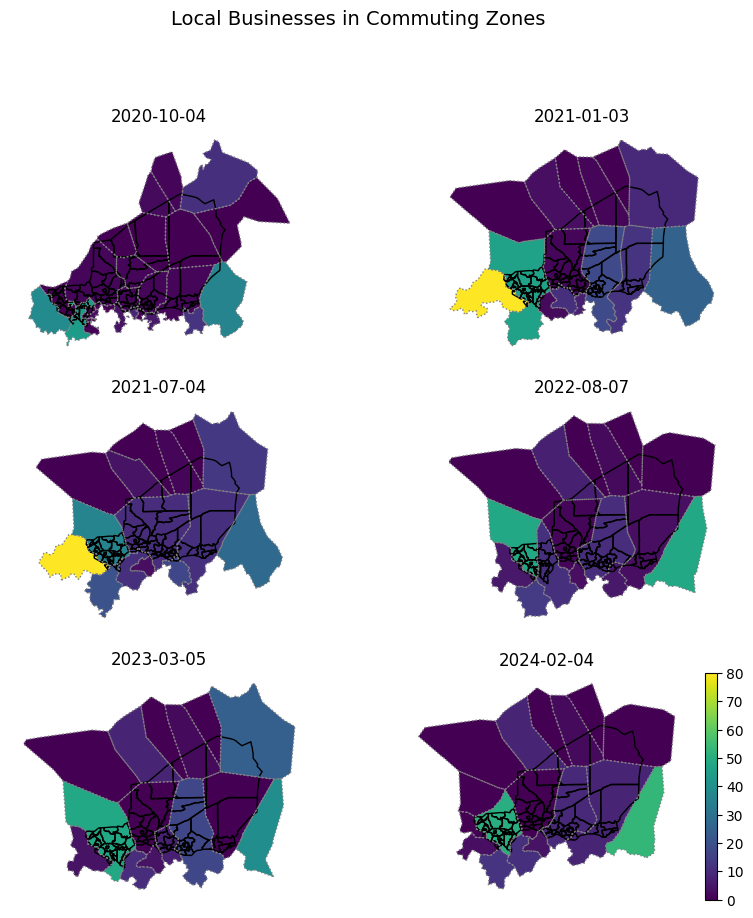

In [95]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
ax = axs.flatten()

for i, date in enumerate(
    ["2020-10-04", "2021-01-03", "2021-07-04", "2022-08-07", "2023-03-05", "2024-02-04"]
):
    if i > 4:
        legend_bool = True
    else:
        legend_bool = False

    niger_adm2.boundary.plot(ax=ax[i], color="black", linewidth=1)
    commuting_zones_niger[commuting_zones_niger["ds"] == date].boundary.plot(
        ax=ax[i], color="grey", linewidth=1, linestyle="dotted"
    )
    commuting_zones_niger[commuting_zones_niger["ds"] == date].plot(
        ax=ax[i],
        column="local_business_locations_count",
        cmap="viridis",
        vmin=0,
        vmax=80,
        legend=legend_bool,
    )
    ax[i].set_title(date)

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)


# ax[0].text(0,0,'Source: Meta Commuting Zones')

plt.suptitle("Local Businesses in Commuting Zones", x=0.5, y=1, fontsize=14);

# fig.savefig('../../docs/images/commuting_zones_population.svg', format='SVG', dpi=300);

### Observations and Limitations

- The number of businesses is estimated from the Facebook Business Pages which are limited. 
- There was high facebook page activity near the bordern between Niger, Mali and Burkina Faso potentially due to condolensces for COVID victims/relief activities. 
